In [54]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#Loading Dataset
DATASET_PATH = "Datasets/Covid_Data.csv"
COVID = pd.read_csv(DATASET_PATH)

In [56]:
#Duplicates
duplicates = COVID.duplicated()
COVID[duplicates]

# TODO Neviem ci ich aj vymaze

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [57]:
COVID.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [58]:
COVID["DATE_DIED"] = pd.to_datetime(COVID["DATE_DIED"], format="%d/%m/%Y", errors="coerce")
COVID['DATE_DIED_NUM'] = COVID['DATE_DIED'].astype('int64') // 10**9  # convert to seconds

In [59]:
#Filling missing values
#TODO not sure about this
COVID_cl = COVID.dropna()
COVID_cl = COVID.dropna(axis=1)
COVID_cl = COVID.fillna(COVID.mean())

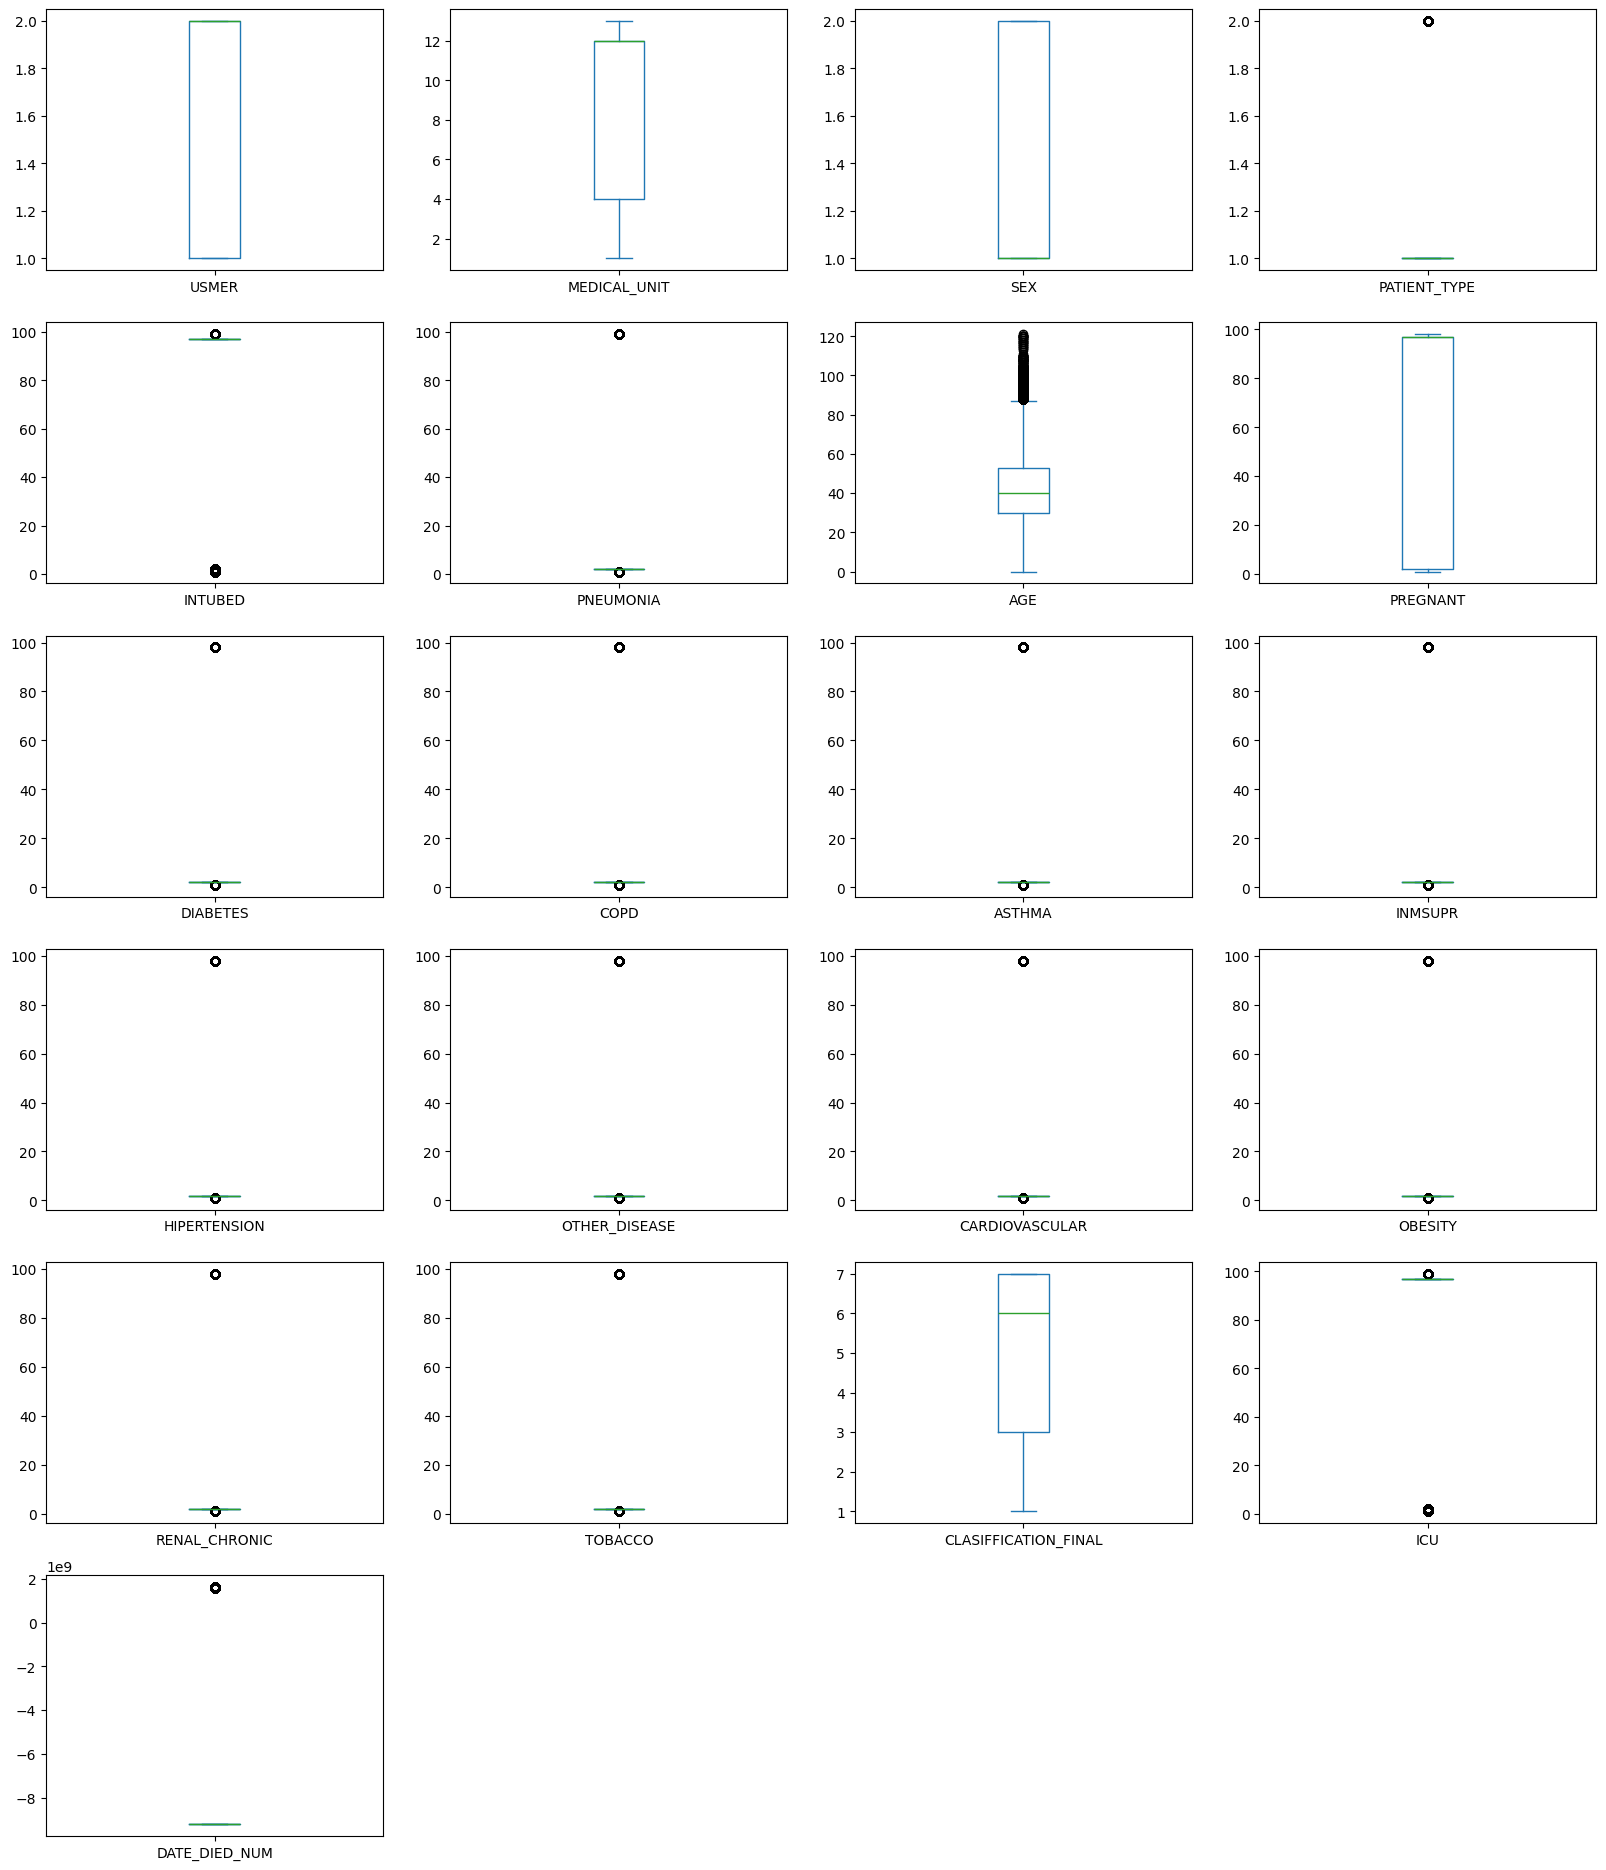

In [60]:
# columns = ["USMER","MEDICAL_UNIT","SEX","PATIENT_TYPE","DATE_DIED","INTUBED","PNEUMONIA","AGE","PREGNANT","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","CLASIFFICATION_FINAL","ICU"]

columns = COVID.columns
# TODO using not cleaned up version
# axes = COVID[columns].plot (
#     kind='box',
#     subplots=True,
#     layout=(10,4),
#     figsize=(20,40)
# )
# plt.show()

In [61]:
for col in COVID_cl.select_dtypes(include=['number']).columns:
    Q1 = COVID[col].quantile(0.25)
    Q3 = COVID[col].quantile(0.75)
    IQR = Q3 - Q1

    COVID_cl = COVID_cl[(COVID_cl[col] >= Q1 - 1.5 * IQR) & (COVID_cl[col] <= Q3 + 1.5 * IQR)]

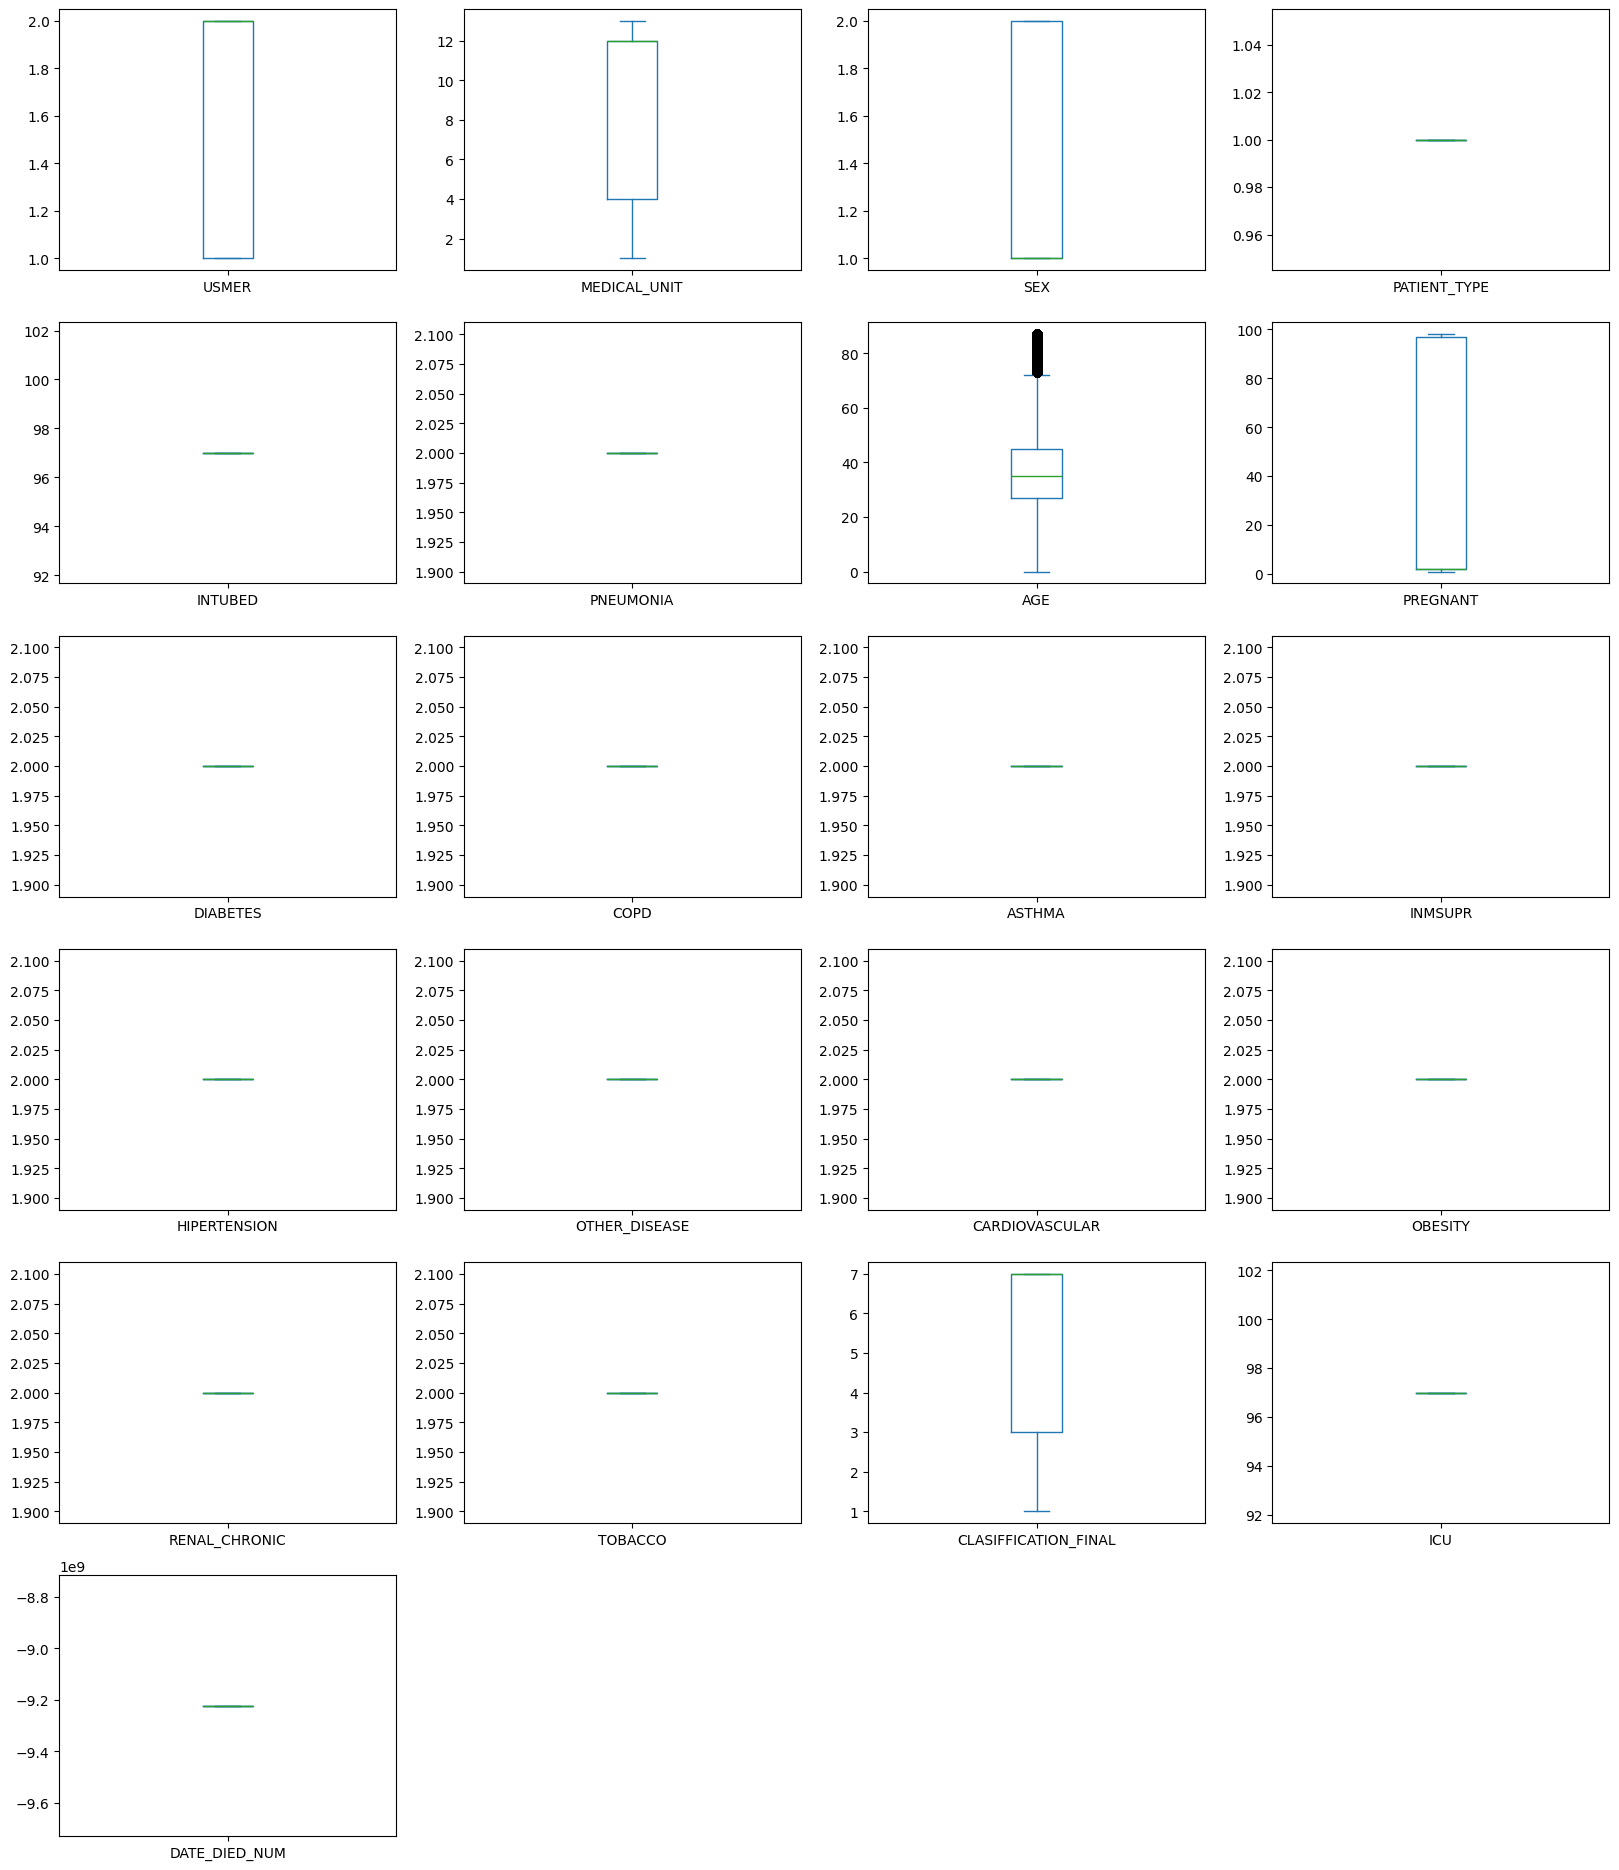

In [62]:
axes = COVID_cl[columns].plot (
    kind='box',
    subplots=True,
    layout=(10,4),
    figsize=(20,40)
)
plt.show()